# SLIC 

## Algorithm

**Description:** The SLIC superpixels algorithm segments pixels in an image file to efficiently generate compact, nearly uniform superpixels.

**Inputs:** 
    1. image: the image to be segmented
    2. n_segments: defines how many superpixel segments we want to generate (defaults to 100 segments)
    3. sigma: the standard deviation for the smoothing Gaussian kernel applied before segmentation
    4. max_iter: the maximum number of iterations for k-means clustering

**Outputs:**
    1. The segmented image 
    
**Function Pseudocode**
    1. load the image and convert it to a floating point data type using the img_as_float function from skimage.util
    2. create an image for the overlaying superpixel segments using the slic function from skimage.segmentation
    3. mark the boundaries of the segments using the mark_boundaries function from skimage.segmentation 

## Write Code

In [ ]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

# load the image and convert it to a floating point data type
image = img_as_float(io.imread(args["image"]))

#creates an image for the overlaying superpixels
segments = slic(image, n_segments = numSegments, sigma = 5)

#takes our original image and overlays our superpixel segments
ax.imshow(mark_boundaries(image, segments))

## Simulation
* SLIC Superpixel functionality will be tested to show that the algorithm works properly under ideal conditions and non-ideal conditions. Data will be be sampled from two synthetic sets, one with 100 5x5 'synapse' clusters of intensity 100 within a 100x100 area, and one with a perfectly uniform data set of area 20x20 with intensity 100.

### Functionality Testing
#### Success 
* we expect the SLIC Superpixel algorithm to segment the the two-synapse data set into 400 clusters

#### Failure 
* we expect the SLIC Superpixel algorithm to segment the area in a grid-like pattern, as there are no clusters in the data to segment, and the algorithm naturally tries to equalize the size of the segments. 

**1. Load Functionality Data**

In [1]:
import sys
sys.path.insert(0,'../code/functions/')
import pickle
import matplotlib.pyplot as plt


clusterGrid = pickle.load(open('../code/tests/synthDat/clusterGrid.synth'))
all100Dat = pickle.load(open('../code/tests/synthDat/all100.synth'))
all100DatSlice = all100Dat[10]

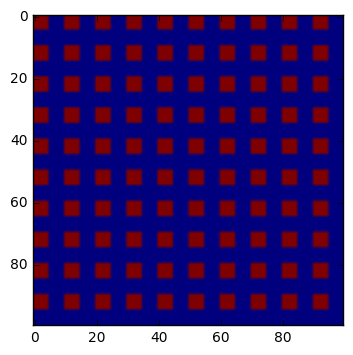

In [3]:
#the hundred-synapse data
plt.imshow(clusterGrid)
plt.show()

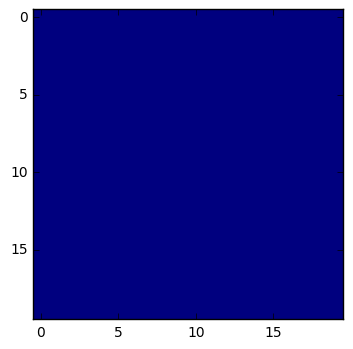

In [21]:
#the perfectly uniform data
plt.imshow(all100DatSlice)
plt.show()

**2. Generate Functionality Results**

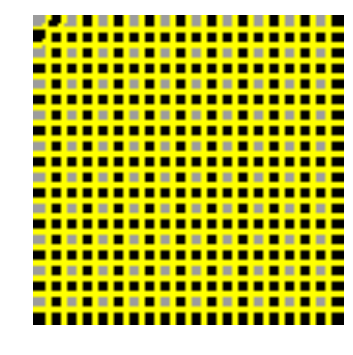

In [49]:
#import the library code
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

#creates an image for the overlaying superpixels
segments = slic(clusterGrid, sigma = 5, n_segments = 400)

#takes our original image and overlays our superpixel segments
plt.imshow(mark_boundaries(clusterGrid, segments))
plt.axis("off")
plt.show()

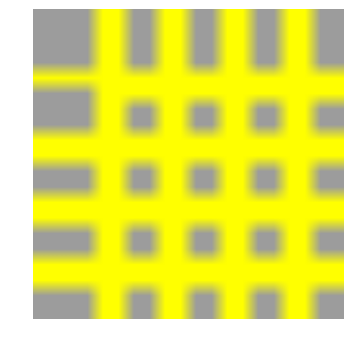

In [45]:
#creates an image for the overlaying superpixels
segments = slic(all100DatSlice, sigma = 5, max_iter = 50, n_segments = 25)

#takes our original image and overlays our superpixel segments
plt.imshow(mark_boundaries(all100DatSlice, segments))
plt.axis("off")
plt.show()

**3. Analyze Functionality Results**
The results are consistent with the hypothesis. The data performed well on an image that contains distinct, disparate clusters, and poorly on an image that is uniform and does not contain any clusters. 

# Real Data Testing
**2. Displaying raw data**

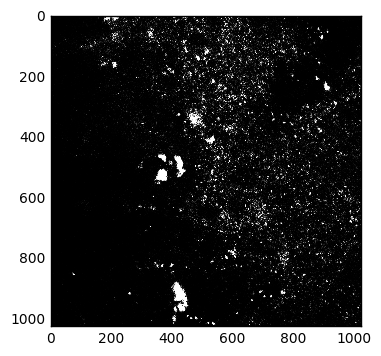

In [4]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread("../figures/post_stitch.jpg")
plt.imshow(im)
plt.show()

**3. Predicting Performance**
Looking at the data, there seem to be many large distinct cluster, and many smaller grouped clusters. This leads me to believe that the larger clusters will be segmented very well, and the smaller clusters will be segmented into groups. I also suspenct that the background will be segmented in a grid-pattern, as the algorithm naturally tries to equalize the size of the segmented groups.

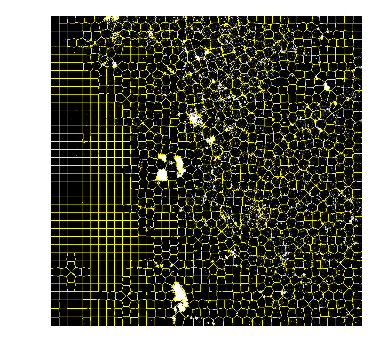

In [20]:
#imports 
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

#creates an image for the overlaying superpixels
segments = slic(im, n_segments = 1500)

#takes our original image and overlays our superpixel segments
plt.imshow(mark_boundaries(im, segments))
plt.axis("off")
plt.show()

**5. Document performance accuracy relative to predictions**
As predicted, the larger clusters were semgented very well, while the smaller, grouped clusters were segmented into groups rather than individually. The background was also segmented into a grid. In the future, an algorithm that allows segmentation with non-restrictive segmentation size would improve performance, as it could group the entire background into one segment, and segment each small cluster individually rather than group them together as to equalize the size of the segments.  